# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())


   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64
Median:  380.56


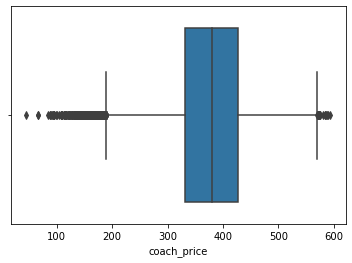

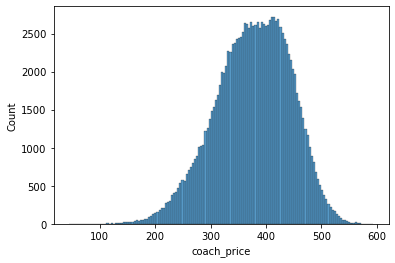

<Figure size 432x288 with 0 Axes>

In [25]:
## Task 1
print(flight.coach_price.describe())
print('Median: ', np.median(flight.coach_price))

sns.boxplot(data = flight, x = 'coach_price')
plt.show()
plt.clf()

sns.histplot(x = 'coach_price', data = flight)
plt.show()
plt.clf()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64
Median:  437.115


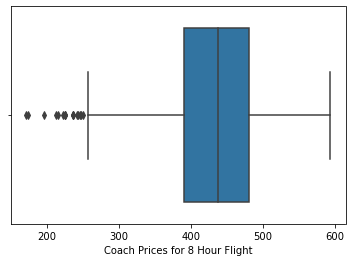

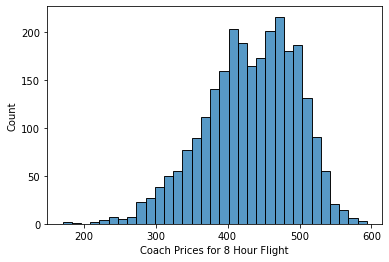

<Figure size 432x288 with 0 Axes>

In [24]:
## Task 2

print(flight.coach_price[flight.hours == 8].describe())
print('Median: ', np.median(flight.coach_price[flight.hours == 8]))

sns.boxplot(data = flight, x = flight.coach_price[flight.hours == 8])
plt.xlabel('Coach Prices for 8 Hour Flight')
plt.show()
plt.clf()

sns.histplot(x = flight.coach_price[flight.hours == 8], data = flight)
plt.xlabel('Coach Prices for 8 Hour Flight')
plt.show()
plt.clf()


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64
Number of Flights Observed:  129780
Number of Flights Observed with Delay Over 50:  115
Percent of flights with over 50 delay:  0.0008861149637848667


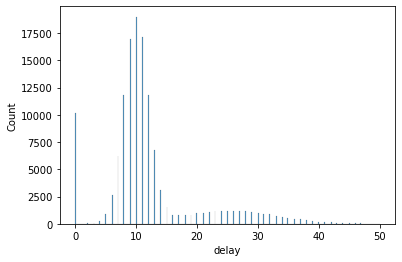

<Figure size 432x288 with 0 Axes>

In [39]:
## Task 3
print(flight.delay.describe())
print('Number of Flights Observed: ', len(flight.delay))
print('Number of Flights Observed with Delay Over 50: ', len(flight.delay[flight.delay > 50]))
print('Percent of flights with over 50 delay: ', 115 / 129780)

#restricting delays to 50 or under as the massive 1560 outlier was making the data difficult to see
sns.histplot(x = flight.delay[flight.delay <= 50])
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

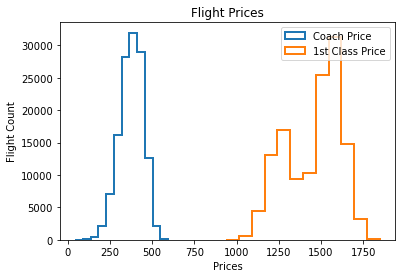

<Figure size 432x288 with 0 Axes>

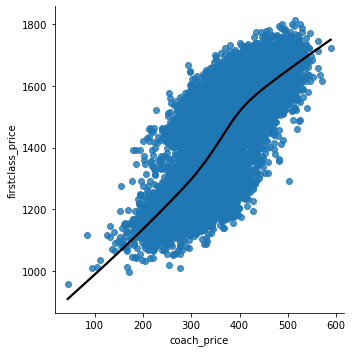

<Figure size 432x288 with 0 Axes>

In [45]:
## Task 4

plt.hist(flight.coach_price, bins = 12, histtype = 'step', linewidth = 2)
plt.hist(flight.firstclass_price, bins = 12, histtype = 'step', linewidth = 2)
plt.legend(['Coach Price', '1st Class Price'])
plt.title('Flight Prices')
plt.xlabel('Prices')
plt.ylabel('Flight Count')
plt.show()
plt.clf()

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

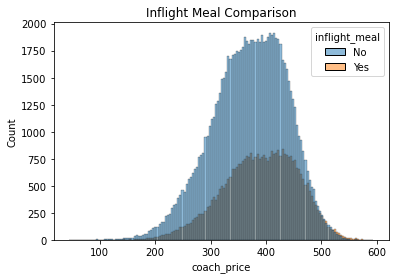

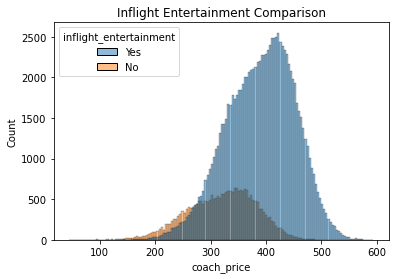

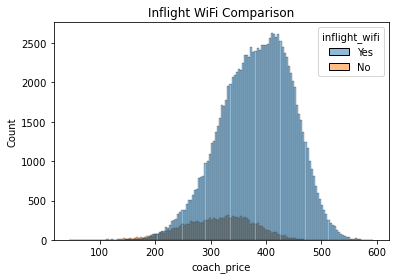

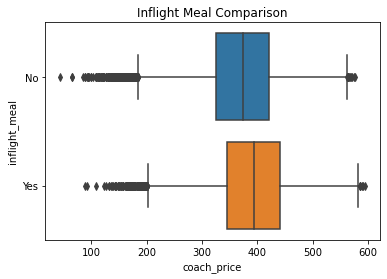

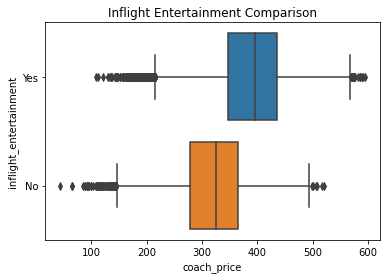

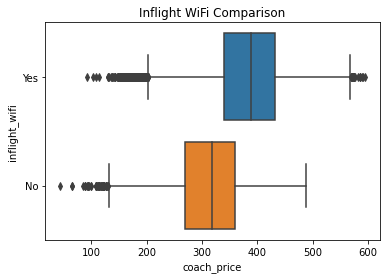

<Figure size 432x288 with 0 Axes>

In [61]:
## Task 5

# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.title('Inflight Meal Comparison')
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.title('Inflight Entertainment Comparison')
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.title('Inflight WiFi Comparison')
plt.show()
plt.clf()

# Using side-by-side box plots instead

# Inflight Meals
sns.boxplot(data = flight, x = 'coach_price', y = 'inflight_meal')
plt.title('Inflight Meal Comparison')
plt.show()
plt.clf()

# Inflight Entertainment
sns.boxplot(data = flight, x = 'coach_price', y = 'inflight_entertainment')
plt.title('Inflight Entertainment Comparison')
plt.show()
plt.clf()

# Inflight WiFi
sns.boxplot(data = flight, x = 'coach_price', y = 'inflight_wifi')
plt.title('Inflight WiFi Comparison')
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

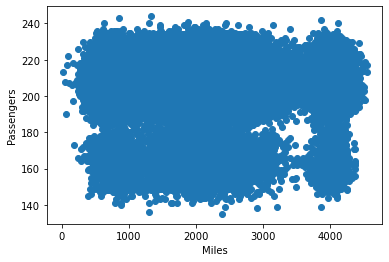

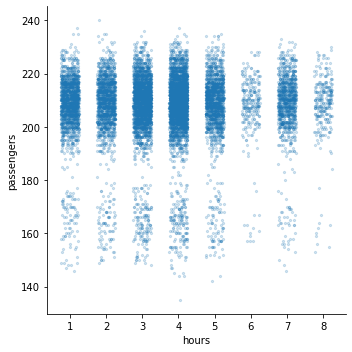

<Figure size 432x288 with 0 Axes>

In [52]:
## Task 6

# first tried a scatterplot, too much data to show much, however, it hinted at not much in the way of change
plt.scatter(flight.miles, flight.passengers)
plt.xlabel('Miles')
plt.ylabel('Passengers')
plt.show()
plt.clf()

# next tried a linear model plot to get a better idea

sns.lmplot(x = 'hours', y = 'passengers', data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

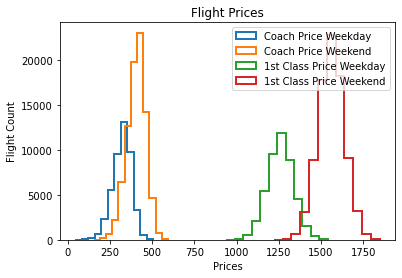

<Figure size 432x288 with 0 Axes>

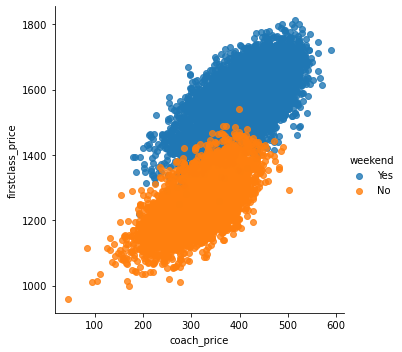

<Figure size 432x288 with 0 Axes>

In [58]:
## Task 7

plt.hist(flight.coach_price[flight.weekend == 'No'], bins = 12, histtype = 'step', linewidth = 2)
plt.hist(flight.coach_price[flight.weekend == 'Yes'], bins = 12, histtype = 'step', linewidth = 2)
plt.hist(flight.firstclass_price[flight.weekend == 'No'], bins = 12, histtype = 'step', linewidth = 2)
plt.hist(flight.firstclass_price[flight.weekend == 'Yes'], bins = 12, histtype = 'step', linewidth = 2)
plt.legend(['Coach Price Weekday', 'Coach Price Weekend', '1st Class Price Weekday', '1st Class Price Weekend'])
plt.title('Flight Prices')
plt.xlabel('Prices')
plt.ylabel('Flight Count')
plt.show()
plt.clf()

sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False)
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

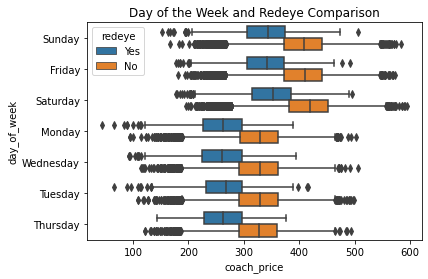

<Figure size 432x288 with 0 Axes>

In [63]:
## Task 8

sns.boxplot(data = flight, x = 'coach_price', y = 'day_of_week', hue = 'redeye')
plt.title('Day of the Week and Redeye Comparison')
plt.show()
plt.clf()


